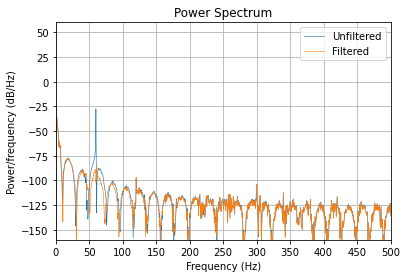

In [120]:
# Open Loop Voltage
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

openLoop = loadmat('openloop60hertz.mat')
Fs = 1000
t = np.arange(len(openLoop['openLoopVoltage']))/Fs
#fig,ax = plt.subplots()
#ax.plot(t,openLoop['openLoopVoltage'],linewidth=0.6)
#ax.set_ylabel('Voltage (V)')
#ax.set_xlabel('Time (s)')
#ax.set_title('Open-Loop Voltage with 60 Hz Noise')
#ax.grid()
#ax.set_ylim(-9,-7.2);ax.set_xlim(0,2)
#fig.savefig('./program1.png',dpi=500)

# Butterworth Notch Filter
from scipy import signal
b,a = (signal.iirfilter(N=5,Wn=[59,61],btype='bandstop',
                        analog=False,ftype='butter',fs=Fs))
freq,h = signal.freqz(b,a,fs=Fs)
#fig,ax = plt.subplots()
#ax.plot(freq,20*np.log10(np.abs(h)))
#ax.set_ylabel('Magnitude (dB)')
#ax.set_xlabel('Frequency (Hz)')
#ax.set_title('Magnitude Response (dB)')
#ax.set_xticks(np.arange(0,501,50))
#ax.grid()
#ax.autoscale(enable=True,axis='x',tight=True)
#fig.savefig('./program2.png',dpi=500)

# Using Filtfilt
buttLoop = signal.filtfilt(b,a,openLoop['openLoopVoltage'].flatten())
#fig,ax = plt.subplots()
#ax.plot(t,openLoop['openLoopVoltage'],linewidth=0.6,label='Unfiltered')
#ax.plot(t,buttLoop,linewidth=0.6,label='Filtered')
#ax.set_ylabel('Voltage (V)')
#ax.set_xlabel('Time (s)')
#ax.set_title('Open-Loop Voltage')
#ax.legend();ax.grid()
#ax.autoscale(enable=True,axis='x',tight=True)
#fig.savefig('./program3.png',dpi=500)

# Power spectrum
fopen,Popen = (signal.periodogram(openLoop['openLoopVoltage'].flatten(),
                                  fs=Fs,nfft=2048))
fbutt,Pbutt = signal.periodogram(buttLoop,fs=Fs,nfft=2048)
fig,ax = plt.subplots()
ax.plot(fopen,20*np.log10(np.abs(Popen)),linewidth=0.6,label='Unfiltered')
ax.plot(fbutt,20*np.log10(np.abs(Pbutt)),linewidth=0.6,label='Filtered')
ax.set_ylabel('Power/frequency (dB/Hz)')
ax.set_xlabel('Frequency (Hz)')
ax.set_title('Power Spectrum')
ax.set_ylim(-160,60)
ax.set_xticks(np.arange(0,501,50))
ax.legend();ax.grid()
ax.autoscale(enable=True,axis='x',tight=True)
fig.savefig('./program4.png',dpi=500)